In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import string
import spacy

from matplotlib.pyplot import imread
from wordcloud import WordCloud, STOPWORDS
%matplotlib inline

In [2]:
# load the dataset
reviews =pd.read_csv('httpswww.amazon.inNew-Apple-Watch-GPS-Cellular-44mmproduct-reviewsB08J6MJ7B3ref=cm_cr_dp_d_show_all_btmie=UTF8&reviewerType=all_reviews.csv')
reviews

,Name,Rating,Revieweddate,Year,Reviews
0,Sagarneel,5,04 10,2020,"Apple is Apple, Pay a lot less to give up a li..."
1,Buyer,4,17 08,2021,Great product
2,Arjun,5,09 07,2020,Loved it
3,Rajabrat,4,18 09,2021,Absolute Stunner
4,Aditya,4,05 05,2021,"�Love the UI, Feel & Battery Life."
5,Aakash,5,04 01,2021,�Great for the price! Thanks Amazon Prime!
6,Jaffer,5,04 04,2021,Most worth product
7,Manoj,4,03 06,2020,Amazing
8,Prince,5,05 03,2021,Worth every penny
9,Rakesh,5,01 12,2020,�Great product must buy and good as compared t...


# Text Processing

In [3]:
reviews=[Reviews.strip() for Reviews in reviews.Reviews] # remove both the leading and the trailing characters
reviews=[Reviews for Reviews in reviews if Reviews] # removes empty strings, because they are considered in Python as False
reviews[0:10]

['Apple is Apple, Pay a lot less to give up a little',
 'Great product',
 'Loved it',
 'Absolute Stunner',
 '�Love the UI, Feel & Battery Life.',
 '�Great for the price! Thanks Amazon Prime!',
 'Most worth product',
 'Amazing',
 'Worth every penny',
 '�Great product must buy and good as compared to series 3']

In [4]:
# Joining the list into one string/text
reviews_text=' '.join(reviews)
reviews_text

'Apple is Apple, Pay a lot less to give up a little Great product Loved it Absolute Stunner �Love the UI, Feel & Battery Life. �Great for the price! Thanks Amazon Prime! Most worth product Amazing Worth every penny �Great product must buy and good as compared to series 3 Just amazing love this product �Best value for money variant �Gradually you will understand the value of it'

In [5]:
# remove Twitter username handles from a given twitter text. (Removes @usernames)
from nltk.tokenize import TweetTokenizer
tknzr = TweetTokenizer(strip_handles=True)
review_tokens=tknzr.tokenize(reviews_text)
print(review_tokens)

['Apple', 'is', 'Apple', ',', 'Pay', 'a', 'lot', 'less', 'to', 'give', 'up', 'a', 'little', 'Great', 'product', 'Loved', 'it', 'Absolute', 'Stunner', '�', 'Love', 'the', 'UI', ',', 'Feel', '&', 'Battery', 'Life', '.', '�', 'Great', 'for', 'the', 'price', '!', 'Thanks', 'Amazon', 'Prime', '!', 'Most', 'worth', 'product', 'Amazing', 'Worth', 'every', 'penny', '�', 'Great', 'product', 'must', 'buy', 'and', 'good', 'as', 'compared', 'to', 'series', '3', 'Just', 'amazing', 'love', 'this', 'product', '�', 'Best', 'value', 'for', 'money', 'variant', '�', 'Gradually', 'you', 'will', 'understand', 'the', 'value', 'of', 'it']


In [6]:
# Again Joining the list into one string/text
reviews_text=' '.join(review_tokens)
reviews_text

'Apple is Apple , Pay a lot less to give up a little Great product Loved it Absolute Stunner � Love the UI , Feel & Battery Life . � Great for the price ! Thanks Amazon Prime ! Most worth product Amazing Worth every penny � Great product must buy and good as compared to series 3 Just amazing love this product � Best value for money variant � Gradually you will understand the value of it'

In [7]:
# Remove Punctuations 
no_punc_text=reviews_text.translate(str.maketrans('','',string.punctuation))
no_punc_text

'Apple is Apple  Pay a lot less to give up a little Great product Loved it Absolute Stunner � Love the UI  Feel  Battery Life  � Great for the price  Thanks Amazon Prime  Most worth product Amazing Worth every penny � Great product must buy and good as compared to series 3 Just amazing love this product � Best value for money variant � Gradually you will understand the value of it'

In [8]:
# remove https or url within text
import re
no_url_text=re.sub(r'http\S+', '', no_punc_text)
no_url_text

'Apple is Apple  Pay a lot less to give up a little Great product Loved it Absolute Stunner � Love the UI  Feel  Battery Life  � Great for the price  Thanks Amazon Prime  Most worth product Amazing Worth every penny � Great product must buy and good as compared to series 3 Just amazing love this product � Best value for money variant � Gradually you will understand the value of it'

In [52]:
from nltk.tokenize import word_tokenize
review_tokens=word_tokenize(no_url_text)
print(review_tokens)

['Apple', 'is', 'Apple', 'Pay', 'a', 'lot', 'less', 'to', 'give', 'up', 'a', 'little', 'Great', 'product', 'Loved', 'it', 'Absolute', 'Stunner', '�', 'Love', 'the', 'UI', 'Feel', 'Battery', 'Life', '�', 'Great', 'for', 'the', 'price', 'Thanks', 'Amazon', 'Prime', 'Most', 'worth', 'product', 'Amazing', 'Worth', 'every', 'penny', '�', 'Great', 'product', 'must', 'buy', 'and', 'good', 'as', 'compared', 'to', 'series', '3', 'Just', 'amazing', 'love', 'this', 'product', '�', 'Best', 'value', 'for', 'money', 'variant', '�', 'Gradually', 'you', 'will', 'understand', 'the', 'value', 'of', 'it']


In [53]:
# Tokenization
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\anbuc\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\anbuc\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [54]:
# Tokens count
len(review_tokens)

72

In [55]:
# Remove Stopwords
from nltk.corpus import stopwords
my_stop_words=stopwords.words('english')

sw_list = ['\x92','rt','ye','yeah','haha','Yes','U0001F923','I']
my_stop_words.extend(sw_list)

no_stop_tokens=[word for word in review_tokens if not word in my_stop_words]
print(no_stop_tokens)

['Apple', 'Apple', 'Pay', 'lot', 'less', 'give', 'little', 'Great', 'product', 'Loved', 'Absolute', 'Stunner', '�', 'Love', 'UI', 'Feel', 'Battery', 'Life', '�', 'Great', 'price', 'Thanks', 'Amazon', 'Prime', 'Most', 'worth', 'product', 'Amazing', 'Worth', 'every', 'penny', '�', 'Great', 'product', 'must', 'buy', 'good', 'compared', 'series', '3', 'Just', 'amazing', 'love', 'product', '�', 'Best', 'value', 'money', 'variant', '�', 'Gradually', 'understand', 'value']


In [57]:
# Normalize the data
lower_words=[Text.lower() for Text in no_stop_tokens]
print(lower_words[0:15])

['apple', 'apple', 'pay', 'lot', 'less', 'give', 'little', 'great', 'product', 'loved', 'absolute', 'stunner', '�', 'love', 'ui']


In [58]:
# Stemming (Optional)
from nltk.stem import PorterStemmer
ps=PorterStemmer()
stemmed_tokens=[ps.stem(word) for word in lower_words]
print(stemmed_tokens[0:15])

['appl', 'appl', 'pay', 'lot', 'less', 'give', 'littl', 'great', 'product', 'love', 'absolut', 'stunner', '�', 'love', 'ui']


In [59]:
# Lemmatization
nlp=spacy.load('en_core_web_sm')
doc=nlp(' '.join(lower_words))
print(doc)

apple apple pay lot less give little great product loved absolute stunner � love ui feel battery life � great price thanks amazon prime most worth product amazing worth every penny � great product must buy good compared series 3 just amazing love product � best value money variant � gradually understand value


In [60]:
lemmas=[token.lemma_ for token in doc]
print(lemmas)

['apple', 'apple', 'pay', 'lot', 'less', 'give', 'little', 'great', 'product', 'love', 'absolute', 'stunner', '�', 'love', 'ui', 'feel', 'battery', 'life', '�', 'great', 'price', 'thank', 'amazon', 'prime', 'most', 'worth', 'product', 'amazing', 'worth', 'every', 'penny', '�', 'great', 'product', 'must', 'buy', 'good', 'compare', 'series', '3', 'just', 'amazing', 'love', 'product', '�', 'good', 'value', 'money', 'variant', '�', 'gradually', 'understand', 'value']


In [61]:
clean_reviews=' '.join(lemmas)
clean_reviews

'apple apple pay lot less give little great product love absolute stunner � love ui feel battery life � great price thank amazon prime most worth product amazing worth every penny � great product must buy good compare series 3 just amazing love product � good value money variant � gradually understand value'

# Feature Extraction

# 1.Using CountVectorizer

In [62]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
reviewscv=cv.fit_transform(lemmas)

In [63]:
print(cv.vocabulary_)

{'apple': 3, 'pay': 22, 'lot': 17, 'less': 14, 'give': 9, 'little': 16, 'great': 12, 'product': 26, 'love': 18, 'absolute': 0, 'stunner': 28, 'ui': 30, 'feel': 8, 'battery': 4, 'life': 15, 'price': 24, 'thank': 29, 'amazon': 2, 'prime': 25, 'most': 20, 'worth': 34, 'amazing': 1, 'every': 7, 'penny': 23, 'must': 21, 'buy': 5, 'good': 10, 'compare': 6, 'series': 27, 'just': 13, 'value': 32, 'money': 19, 'variant': 33, 'gradually': 11, 'understand': 31}


In [64]:
print(cv.get_feature_names()[0:15])

['absolute', 'amazing', 'amazon', 'apple', 'battery', 'buy', 'compare', 'every', 'feel', 'give', 'good', 'gradually', 'great', 'just', 'less']


In [65]:
print(reviewscv.toarray()[0:15])

[[0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0

In [66]:
print(reviewscv.toarray().shape)

(53, 35)


2. CountVectorizer with N-grams (Bigrams & Trigrams)

In [67]:
cv_ngram_range=CountVectorizer(analyzer='word',ngram_range=(1,3),max_features=100)
bow_matrix_ngram=cv_ngram_range.fit_transform(lemmas)

In [68]:
print(cv_ngram_range.get_feature_names())
print(bow_matrix_ngram.toarray())

['absolute', 'amazing', 'amazon', 'apple', 'battery', 'buy', 'compare', 'every', 'feel', 'give', 'good', 'gradually', 'great', 'just', 'less', 'life', 'little', 'lot', 'love', 'money', 'most', 'must', 'pay', 'penny', 'price', 'prime', 'product', 'series', 'stunner', 'thank', 'ui', 'understand', 'value', 'variant', 'worth']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 1 0 0]]


3. TF-IDF Vectorizer

In [69]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfv_ngram_max_features=TfidfVectorizer(norm='l2',analyzer='word',ngram_range=(1,3),max_features=500)
tfidf_matix_ngram=tfidfv_ngram_max_features.fit_transform(lemmas)

In [70]:
print(tfidfv_ngram_max_features.get_feature_names())
print(tfidf_matix_ngram.toarray())

['absolute', 'amazing', 'amazon', 'apple', 'battery', 'buy', 'compare', 'every', 'feel', 'give', 'good', 'gradually', 'great', 'just', 'less', 'life', 'little', 'lot', 'love', 'money', 'most', 'must', 'pay', 'penny', 'price', 'prime', 'product', 'series', 'stunner', 'thank', 'ui', 'understand', 'value', 'variant', 'worth']
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]]


# Generate Word Cloud

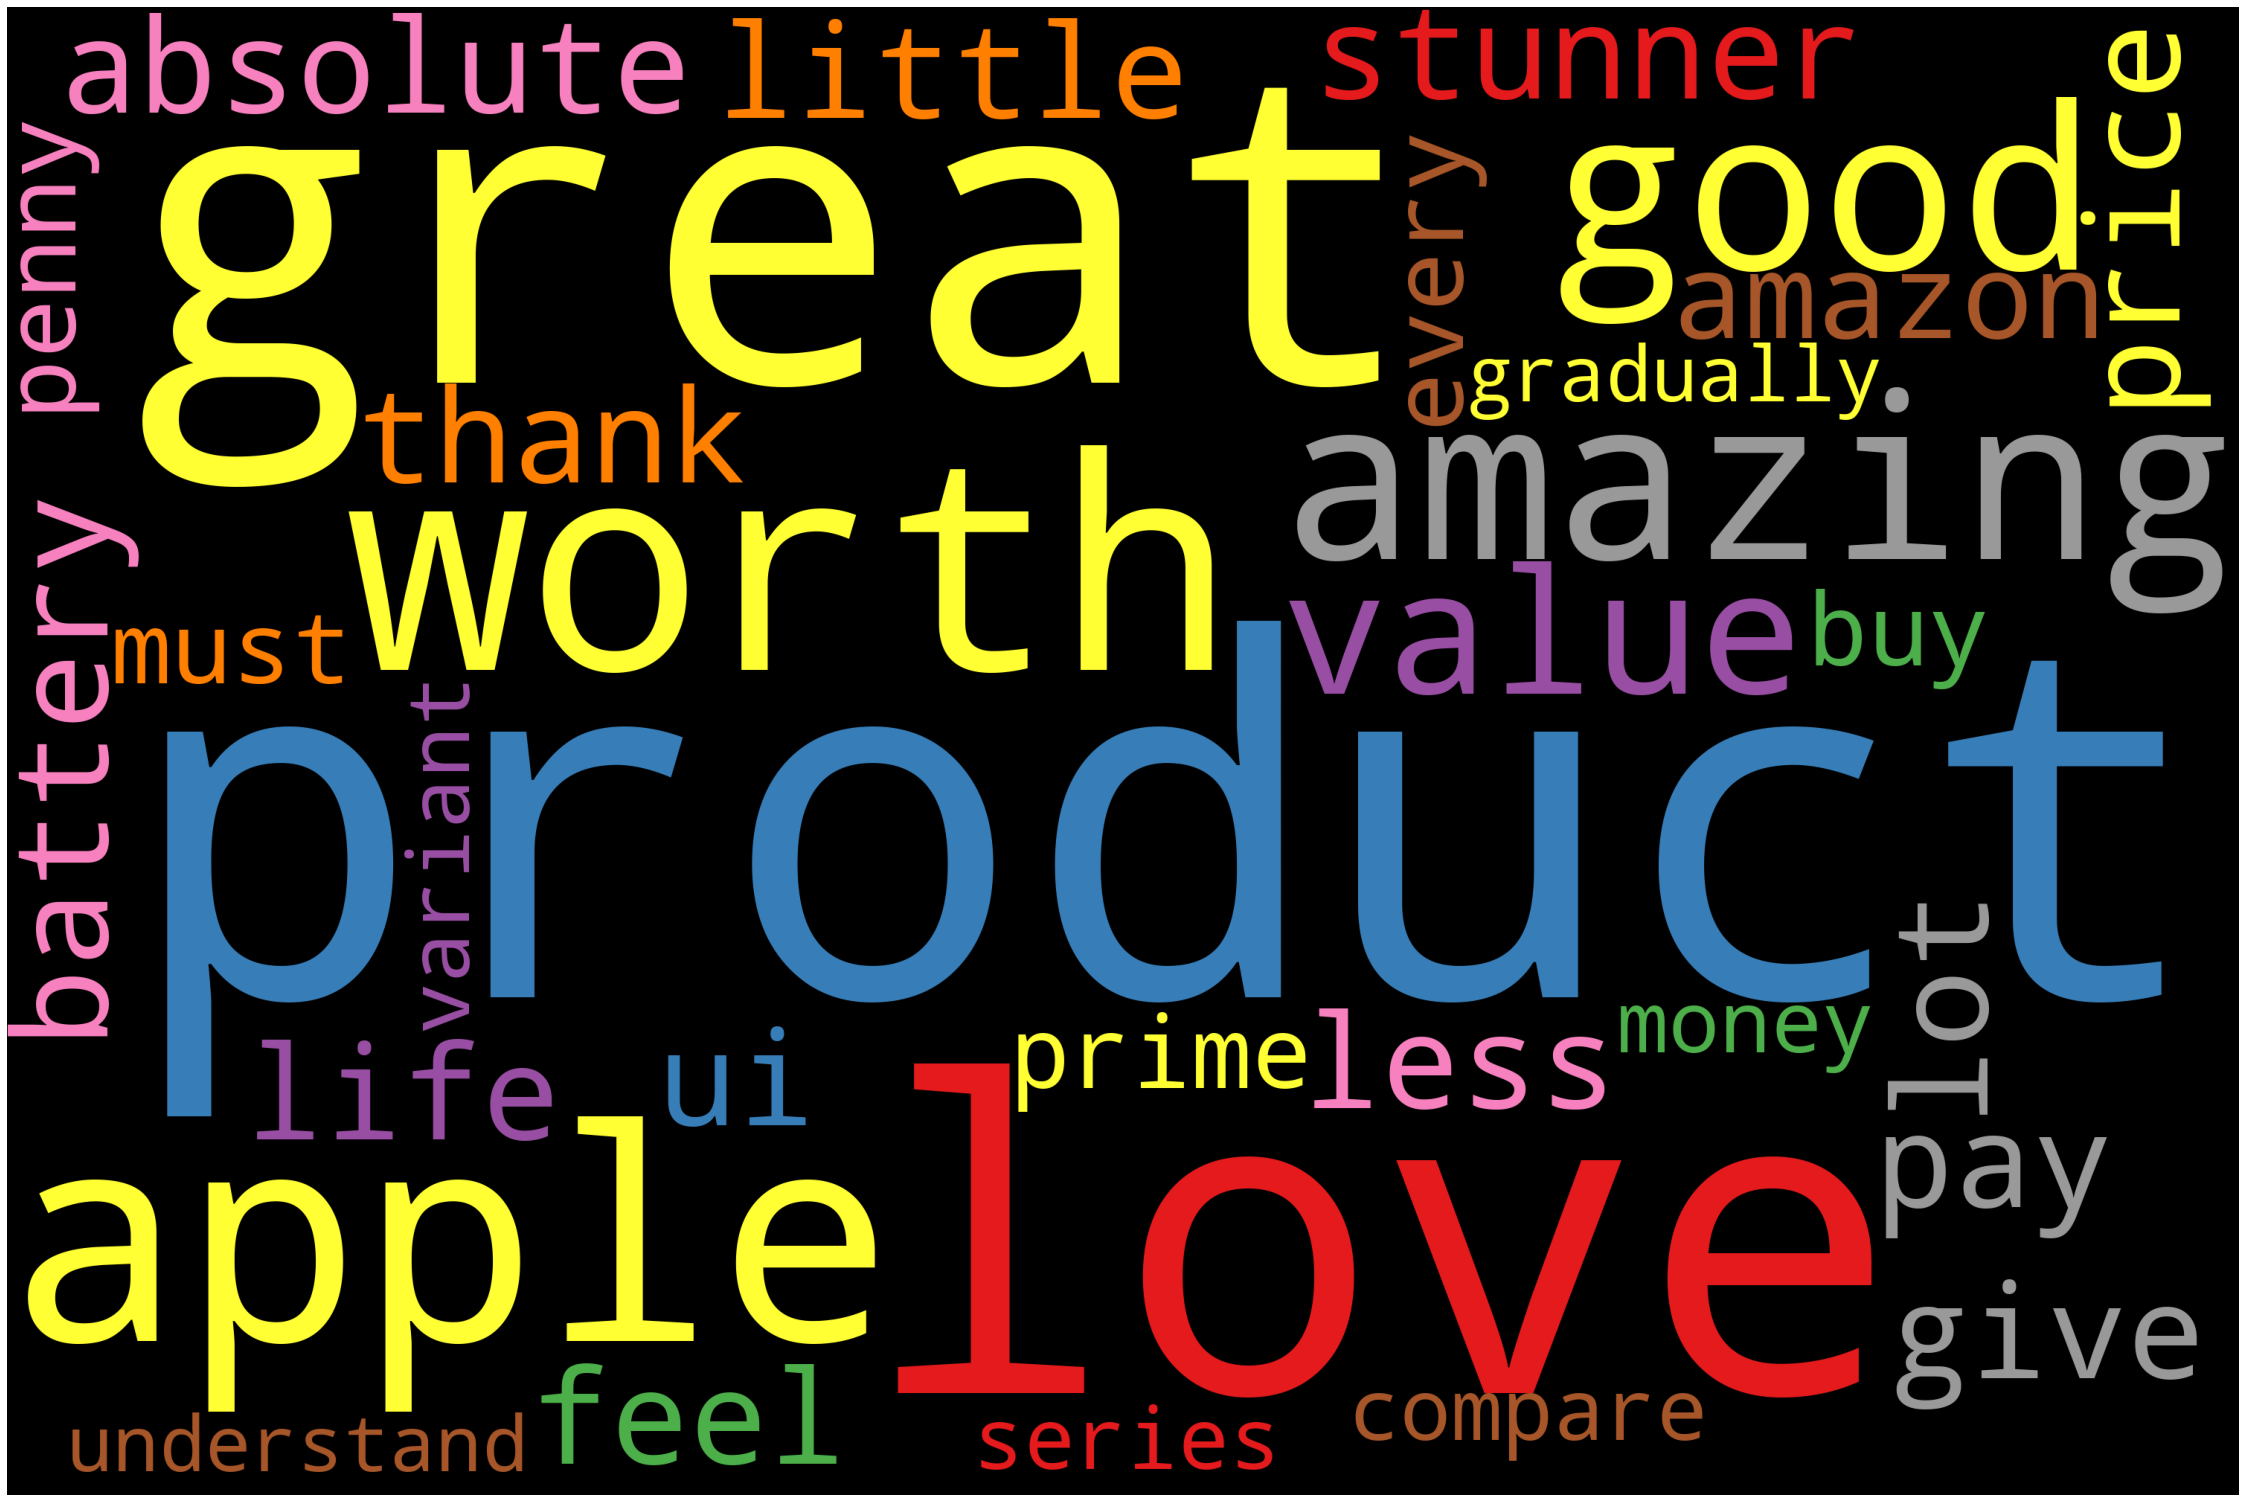

In [71]:
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    plt.figure(figsize=(40,30))
    plt.imshow(wordcloud)
    plt.axis('off')
    
# Generate Word Cloud

STOPWORDS.add('pron')
STOPWORDS.add('rt')
STOPWORDS.add('yeah')
wordcloud=WordCloud(width=3000,height=2000,background_color='black',max_words=50,
                   colormap='Set1',stopwords=STOPWORDS).generate(clean_reviews)
plot_cloud(wordcloud)

# Named Entity Recognition (NER)

In [72]:
# Parts Of Speech (POS) Tagging
nlp=spacy.load('en_core_web_sm')

one_block=clean_reviews
doc_block=nlp(one_block)
spacy.displacy.render(doc_block,style='ent',jupyter=True)

In [73]:
for token in doc_block[0:15]:
    print(token,token.pos_)    

apple NOUN
apple NOUN
pay VERB
lot NOUN
less ADV
give VERB
little ADJ
great ADJ
product NOUN
love VERB
absolute ADJ
stunner NOUN
� PROPN
love NOUN
ui NOUN


In [74]:
# Filtering the nouns and verbs only
nouns_verbs=[token.text for token in doc_block if token.pos_ in ('NOUN','VERB')]
print(nouns_verbs[0:15])

['apple', 'apple', 'pay', 'lot', 'give', 'product', 'love', 'stunner', 'love', 'ui', 'feel', 'battery', 'life', 'price', 'thank']


In [76]:
# Counting the noun & verb tokens
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

X=cv.fit_transform(nouns_verbs)
sum_words=X.sum(axis=0)

words_freq=[(word,sum_words[0,idx]) for word,idx in cv.vocabulary_.items()]
words_freq=sorted(words_freq, key=lambda x: x[1], reverse=True)

wd_df=pd.DataFrame(words_freq)
wd_df.columns=['word','count']
wd_df[0:15] # viewing top ten results

,word,count
0,product,4
1,love,3
2,apple,2
3,value,2
4,pay,1
5,lot,1
6,give,1
7,stunner,1
8,ui,1
9,feel,1


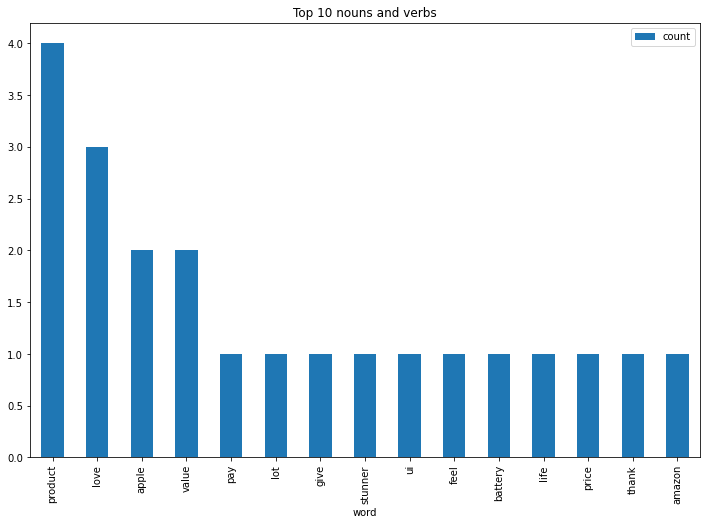

In [77]:
# Visualizing results (Barchart for top 10 nouns + verbs)
wd_df[0:15].plot.bar(x='word',figsize=(12,8),title='Top 10 nouns and verbs');

In [78]:
from nltk import tokenize
sentences=tokenize.sent_tokenize(' '.join(reviews))
sentences

['Apple is Apple, Pay a lot less to give up a little Great product Loved it Absolute Stunner �Love the UI, Feel & Battery Life.',
 '�Great for the price!',
 'Thanks Amazon Prime!',
 'Most worth product Amazing Worth every penny �Great product must buy and good as compared to series 3 Just amazing love this product �Best value for money variant �Gradually you will understand the value of it']

In [79]:
sent_df=pd.DataFrame(sentences,columns=['sentence'])
sent_df

,sentence
0,"Apple is Apple, Pay a lot less to give up a li..."
1,�Great for the price!
2,Thanks Amazon Prime!
3,Most worth product Amazing Worth every penny �...


In [80]:
# Emotion Lexicon - Affin
affin=pd.read_csv('Afinn.csv',sep=',',encoding='Latin-1')
affin

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2
...,...,...
2472,yucky,-2
2473,yummy,3
2474,zealot,-2
2475,zealots,-2


In [81]:
affinity_scores=affin.set_index('word')['value'].to_dict()
affinity_scores

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [82]:
# Custom function: score each word in a sentence in lemmatised form, but calculate the score for the whole original sentence
nlp=spacy.load('en_core_web_sm')
sentiment_lexicon=affinity_scores

def calculate_sentiment(text:str=None):
    sent_score=0
    if text:
        sentence=nlp(text)
        for word in sentence:
            sent_score+=sentiment_lexicon.get(word.lemma_,0)
    return sent_score

In [84]:
# manual testing
calculate_sentiment(text='worth')

2

In [85]:
# Calculating sentiment value for each sentence
sent_df['sentiment_value']=sent_df['sentence'].apply(calculate_sentiment)
sent_df['sentiment_value']

0     5
1     0
2     2
3    18
Name: sentiment_value, dtype: int64

In [86]:
# how many words are there in a sentence?
sent_df['word_count']=sent_df['sentence'].str.split().apply(len)
sent_df['word_count']

0    25
1     4
2     3
3    36
Name: word_count, dtype: int64

In [87]:
sent_df.sort_values(by='sentiment_value')

,sentence,sentiment_value,word_count
1,�Great for the price!,0,4
2,Thanks Amazon Prime!,2,3
0,"Apple is Apple, Pay a lot less to give up a li...",5,25
3,Most worth product Amazing Worth every penny �...,18,36


In [89]:
# Sentiment score of the whole review
sent_df['sentiment_value'].describe()

count     4.000000
mean      6.250000
std       8.098354
min       0.000000
25%       1.500000
50%       3.500000
75%       8.250000
max      18.000000
Name: sentiment_value, dtype: float64

In [90]:
# negative sentiment score of the whole review
sent_df[sent_df['sentiment_value']<=0]

,sentence,sentiment_value,word_count
1,�Great for the price!,0,4


In [91]:
# positive sentiment score of the whole review
sent_df[sent_df['sentiment_value']>0]

,sentence,sentiment_value,word_count
0,"Apple is Apple, Pay a lot less to give up a li...",5,25
2,Thanks Amazon Prime!,2,3
3,Most worth product Amazing Worth every penny �...,18,36


In [92]:
# Adding index cloumn
sent_df['index']=range(0,len(sent_df))
sent_df

,sentence,sentiment_value,word_count,index
0,"Apple is Apple, Pay a lot less to give up a li...",5,25,0
1,�Great for the price!,0,4,1
2,Thanks Amazon Prime!,2,3,2
3,Most worth product Amazing Worth every penny �...,18,36,3


C:\Users\anbuc\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sentiment_value', ylabel='Density'>

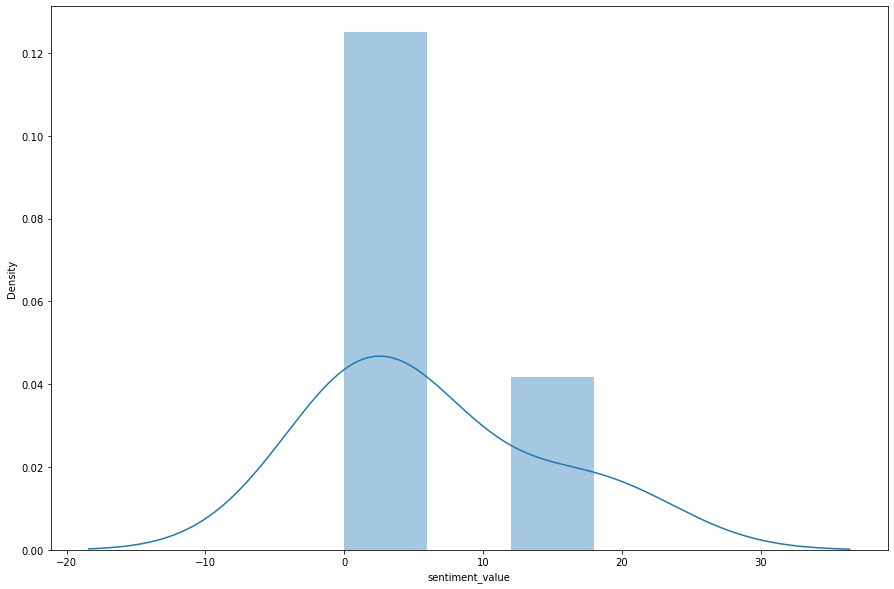

In [93]:
# Plotting the sentiment value for whole review
import seaborn as sns
plt.figure(figsize=(15,10))
sns.distplot(sent_df['sentiment_value'])

<AxesSubplot:xlabel='index', ylabel='sentiment_value'>

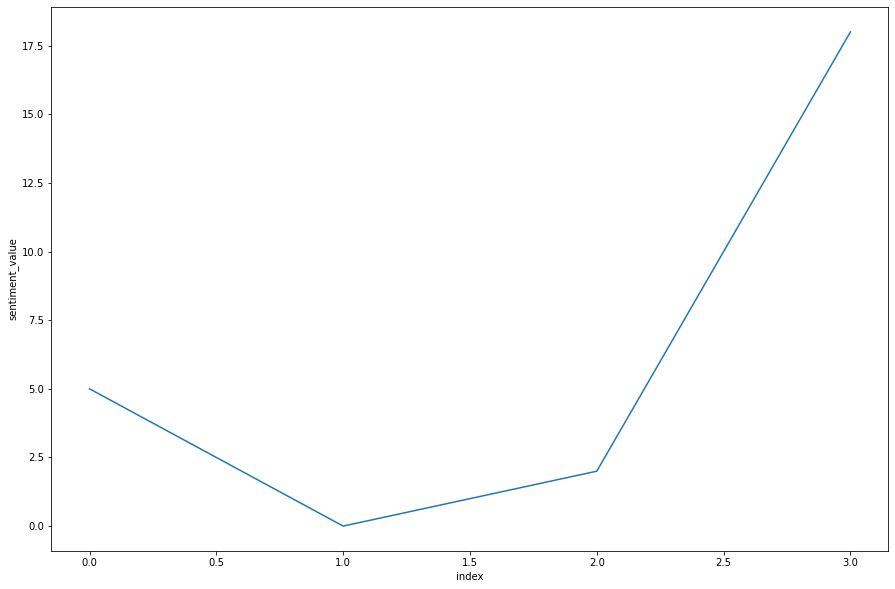

In [94]:
# Plotting the line plot for sentiment value of whole review
plt.figure(figsize=(15,10))
sns.lineplot(y='sentiment_value',x='index',data=sent_df)

<AxesSubplot:title={'center':'Sentence sentiment value to sentence word count'}, xlabel='word_count', ylabel='sentiment_value'>

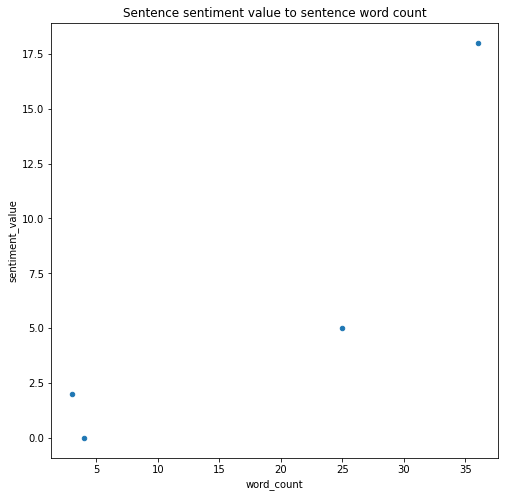

In [95]:
# Correlation analysis
sent_df.plot.scatter(x='word_count',y='sentiment_value',figsize=(8,8),title='Sentence sentiment value to sentence word count')